Esse projeto é interpretado como uma analise de dados servindo como auxilio à equipe de vendas de uma empresa imobiliaria.

O dataset de treino é composto por 81 colunas, sendo 80 colunas descritivas do imovel e 1 coluna com o valor da venda realizada. É interpretado como as vendas realizadas pela empresa no passado.

O dataset de teste é composto por 80 colunas, sendo todas descritivas dos imoveis. É interpretado como os imoveis que estão em carteira para serem vendidos.

A ideia do projeto é auxiliar a equipe de vendas, estimando o valor de venda do imovel com base nas descrições dos imoveis.

# Import de bibliotecas e dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Pre-processamento

Grande parte das colunas são compostas de strings e algumas colunas contem valores nulos. Será necessario tratar esses dois problemas.

## Preenchimento de nulos

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#  df['LotFrontage'] = df['LotFrontage'].fillna()
df['Alley'] = df['Alley'].fillna('Na')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna('Po')
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['Fence'] = df['Fence'].fillna('NA')
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')

In [8]:
valores_nulos = df['BsmtExposure'].isnull()
qtd_nulos = valores_nulos.sum()
preenchimento = ((df['BsmtExposure'].value_counts() / 1460)*100) * qtd_nulos

for categoria, qtd_preencher in preenchimento.items():
    df.loc[valores_nulos, 'BsmtExposure'] = df.loc[valores_nulos, 'BsmtExposure'].fillna(categoria, limit=int(qtd_preencher))

In [9]:
def preencher_nulos_com_proporcao(df, coluna):
    # Contagem das ocorrências de cada categoria
    contagem = df[coluna].value_counts()

    # Calculando a proporção de cada categoria
    proporcao = contagem / len(df)

    # Preenchendo valores nulos com base na proporção das categorias existentes
    valores_nulos = df[coluna].isnull()
    qtd_nulos = valores_nulos.sum()
    preenchimento = proporcao * qtd_nulos

    for categoria, qtd_preencher in preenchimento.items():
        df.loc[valores_nulos, coluna] = df.loc[valores_nulos, coluna].fillna(categoria, limit=int(qtd_preencher))

    return df


def preencher_nulos_igualmente(df, coluna, categorias):
    # Calculando a quantidade de valores nulos
    qtd_nulos = df[coluna].isnull().sum()

    # Dividindo igualmente a quantidade de valores nulos entre as categorias
    qtd_por_categoria = qtd_nulos // len(categorias)

    # Preenchendo os valores nulos com as categorias igualmente
    for categoria in categorias:
        df[coluna].fillna(categoria, inplace=True, limit=qtd_por_categoria)

    return df


In [10]:
df = preencher_nulos_com_proporcao(df,'BsmtFinType1')

In [11]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')

In [12]:
df = df.drop(['PoolQC','MiscFeature'], axis = 1)

In [13]:
valores_nulos = df['GarageYrBlt'].isnull()
qtd_nulos = valores_nulos.sum()
preenchimento = ((df['GarageYrBlt'].value_counts() / 1460)*100) * qtd_nulos

for categoria, qtd_preencher in preenchimento.items():
    df.loc[valores_nulos, 'GarageYrBlt'] = df.loc[valores_nulos, 'GarageYrBlt'].fillna(categoria, limit=int(qtd_preencher))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Encoding

In [15]:
df['LandContour'] = df['LandContour'].map({'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1})
df['MSZoning'] = df['MSZoning'].map({'A ': 1, 'C (all)': 2, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RP': 7, 'RM': 8})  #
df['Street'] = df['Street'].map({'Grvl': 1,'Pave': 2})
df['Alley'] = df['Alley'].map({'Grvl': 1, 'Pave': 2, 'Na':3,})

In [16]:
df['LotShape'] = df['LotShape'].map({'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4})
df['LotConfig'] = df['LotConfig'].map({'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3':5})

In [17]:
df['ExterQual'] = df['ExterQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})
df['GarageQual'] = df['GarageQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})
df['GarageCond'] = df['GarageCond'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})


In [18]:
df['Utilities'] = df['Utilities'].map({'AllPub':1,'NoSeWa':2})
df['LandSlope'] = df['LandSlope'].map({'Gtl': 1, 'Mod': 2, 'Sev': 3})
df['BsmtCond'] = df['BsmtCond'].map({'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})


In [19]:
df['Neighborhood'] = df['Neighborhood'].map({'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5,
                                             'Somerst':6,'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11,
                                             'NAmes':12,'SawyerW':13, 'IDOTRR':14,'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18,
                                             'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24,'Blueste':25})

df['Condition1'] = df['Condition1'].map({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8,'RRNe':9})
df['Condition2'] = df['Condition2'].map({'Norm':1, 'Artery':2, 'RRNn':3, 'Feedr':4, 'PosN':5, 'PosA':6, 'RRAn':7, 'RRAe':8})
df['BldgType'] = df['BldgType'].map({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5})
df['HouseStyle'] = df['HouseStyle'].map({'2Story':1, '1Story':2, '1.5Fin':3, '1.5Unf':4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7,'2.5Fin':8})
df['RoofStyle'] = df['RoofStyle'].map({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6})
df['RoofMatl'] = df['RoofMatl'].map({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6,'Roll':7, 'ClyTile':8})

df['Exterior1st'] = df['Exterior1st'].map({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,'CemntBd':7, 'Plywood':8,
                                           'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,'Stone':13, 'ImStucc':14, 'CBlock':15})
df['Exterior2nd'] = df['Exterior2nd'].map({'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6,'CmentBd':7, 'BrkFace':8,
                                           'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12,'AsphShn':13, 'Stone':14, 'Other':15, 'CBlock':16})

df['MasVnrType'] = df['MasVnrType'].map({'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn':4})
df['ExterCond'] = df['ExterCond'].map({'TA':1, 'Gd':2, 'Fa':3, 'Po':4, 'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'No':1, 'Gd':2, 'Mn':3, 'Av':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'LwQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Unf':1, 'BLQ':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
df['Heating'] = df['Heating'].map({'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6})
df['HeatingQC'] = df['HeatingQC'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':2})
df['Electrical'] = df['Electrical'].map({'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5})

In [20]:
df['Foundation']=df['Foundation'].map({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':6})
df['KitchenQual']=df['KitchenQual'].map({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4})
df['GarageType']=df['GarageType'].map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'CarPort':4, 'Basment':5, '2Types':6})
df['GarageFinish']=df['GarageFinish'].map({'RFn':1, 'Unf':2, 'Fin':3})
df['PavedDrive']=df['PavedDrive'].map({'Y':1, 'N':2, 'P':3})
df['Fence']=df['Fence'].map({'NA':1, 'MnPrv':2, 'GdWo':3, 'GdPrv':4, 'MnWw':5})
df['SaleType']=df['SaleType'].map({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9})
df['SaleCondition']=df['SaleCondition'].map({'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand':4, 'Alloca':5, 'Family':6})
df['Functional']=df['Functional'].map({'Typ':1, 'Min1':2, 'Maj1':3, 'Min2':4, 'Mod':5, 'Maj2':6, 'Sev':7})

In [21]:
df['Functional'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Separação treino e teste

O dataset ja vem definido como uma arquivo para treino e outro para teste. O arquivo de treino será divido novamente em treino e avaliação, em uma proporção de 80% para teste e 20% para treino.

Essa metodologia foi escolhida para evitar o enviesamento do proprio autor, porque, sabendo o resultado do teste, eu poderia escolher o modelo que se enquadra melhor nos dados de teste e não aquele que tem a melhor capacidade de generalização usando dados desconhecidos/novos.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Teste entre modelos


O objetivo da construção do projeto é conseguir prever os valores de venda de imoveis, isso se traduz como um problema de regressão.
Os modelos de machine learning que melhor se enquadram são a regressão linear, o SVR e o gradient boosting. Nesse primeiro momento serão testados as 3 tecnicas para verificar qual tem o melhor resultado ( valor mais proximo do real).

## Regressão Linear

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_reg_lin = model.predict(X_test)

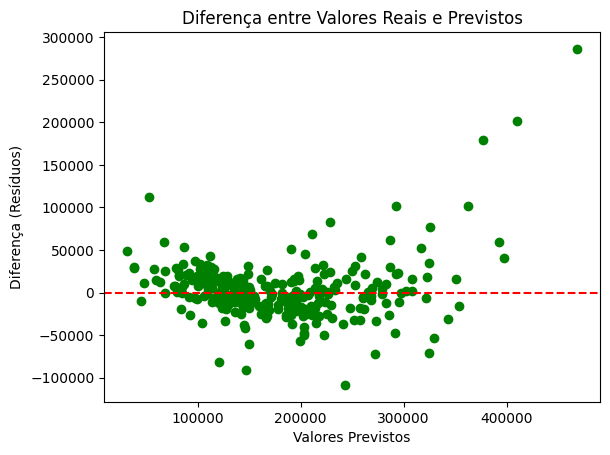

In [29]:
diferencas = y_test - y_reg_lin

# Plotar um gráfico de dispersão das diferenças
plt.scatter(y_reg_lin, diferencas, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Adicionando uma linha horizontal em y=0 para facilitar a visualização das diferenças
plt.xlabel('Valores Previstos')
plt.ylabel('Diferença (Resíduos)')
plt.title('Diferença entre Valores Reais e Previstos')
plt.show()

## SVR

In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
svr = SVR(kernel='rbf')

In [33]:
svr.fit(X_train_scaled, y_train)

SVR()

In [34]:
y_svr = svr.predict(X_test_scaled)

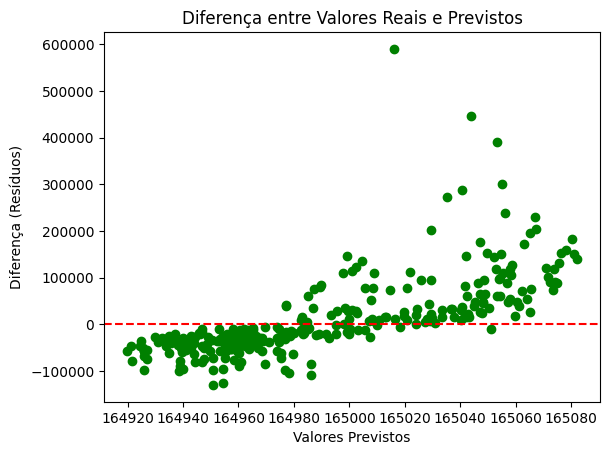

In [35]:
diferencas = y_test - y_svr

# Plotar um gráfico de dispersão das diferenças
plt.scatter(y_svr, diferencas, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Adicionando uma linha horizontal em y=0 para facilitar a visualização das diferenças
plt.xlabel('Valores Previstos')
plt.ylabel('Diferença (Resíduos)')
plt.title('Diferença entre Valores Reais e Previstos')
plt.show()

## Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [38]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
y_gbr = gbr.predict(X_test)

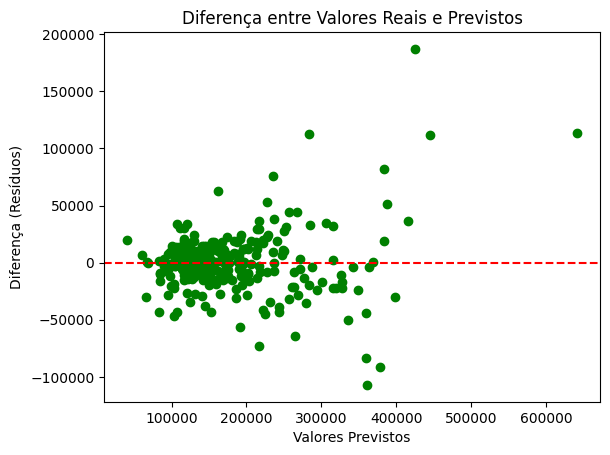

In [40]:
diferencas = y_test - y_gbr

# Plotar um gráfico de dispersão das diferenças
plt.scatter(y_gbr, diferencas, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Adicionando uma linha horizontal em y=0 para facilitar a visualização das diferenças
plt.xlabel('Valores Previstos')
plt.ylabel('Diferença (Resíduos)')
plt.title('Diferença entre Valores Reais e Previstos')
plt.show()

# Analise estatistica

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
# Calculando o erro médio absoluto (MAE)
mae_reg_lin = mean_absolute_error(y_test, y_reg_lin)
mae_svr = mean_absolute_error(y_test, y_svr)
mae_gbr = mean_absolute_error(y_test, y_gbr)
# Calculando o erro quadrático médio (MSE)
mse_reg_lin = mean_squared_error(y_test, y_reg_lin)
mse_svr = mean_squared_error(y_test, y_svr)
mse_gbr = mean_squared_error(y_test, y_gbr)
print("Erro Médio Absoluto (MAE), regressão linear:", mae_reg_lin)
print("Erro Quadrático Médio (MSE), regressão linear:", mse_reg_lin)
print('')
print("Erro Médio Absoluto (MAE), SVR:", mae_svr)
print("Erro Quadrático Médio (MSE), SVR:", mse_svr)
print('')
print("Erro Médio Absoluto (MAE), Gradient Boosting:", mae_gbr)
print("Erro Quadrático Médio (MSE), Gradient Boosting:", mse_gbr)

Erro Médio Absoluto (MAE), regressão linear: 21852.368011663526
Erro Quadrático Médio (MSE), regressão linear: 1270357497.8416226

Erro Médio Absoluto (MAE), SVR: 59530.36985593089
Erro Quadrático Médio (MSE), SVR: 7856613599.124721

Erro Médio Absoluto (MAE), Gradient Boosting: 16880.99283476928
Erro Quadrático Médio (MSE), Gradient Boosting: 741871490.1178594


In [43]:
mae_values = [mae_reg_lin, mae_svr, mae_gbr]
mse_values = [mse_reg_lin, mse_svr, mse_gbr]
model_names = ['Regressão Linear', 'SVR', 'Gradient Boosting']

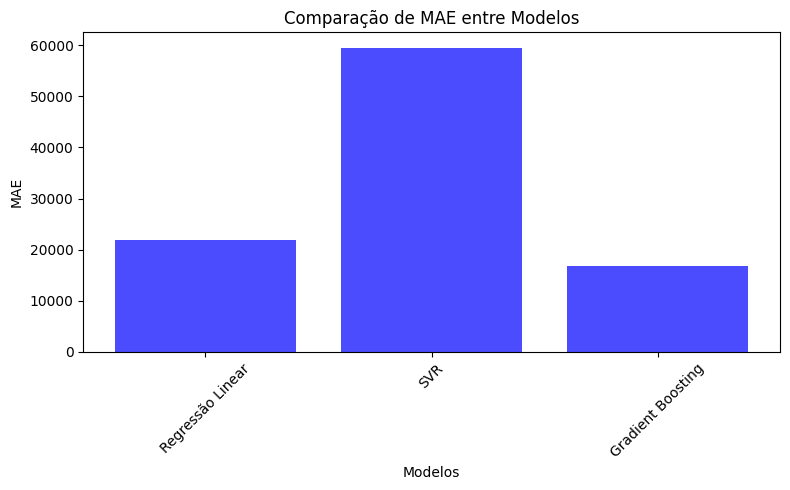

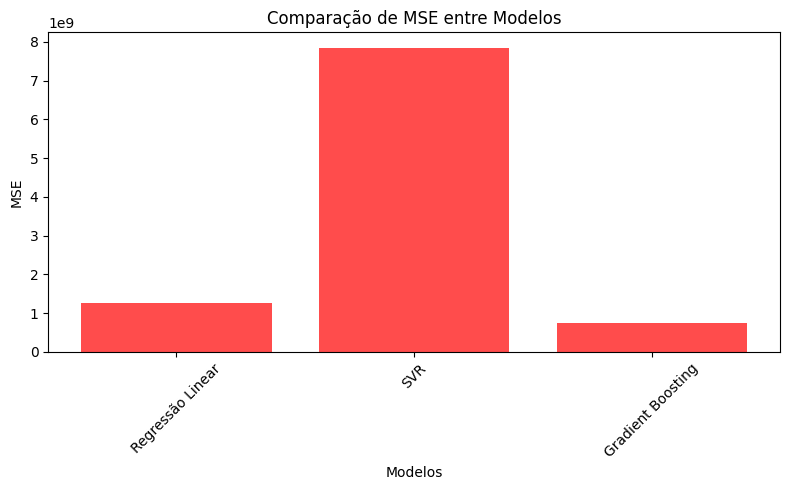

In [44]:
plt.figure(figsize=(8, 5))
plt.bar(model_names, mae_values, color='blue', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparação de MAE entre Modelos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()

# Criando o gráfico de barras para MSE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mse_values, color='red', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparação de MSE entre Modelos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()

O modelo que obteve o melhor resultado foi o gradient boosting. Para a proxima etapa, modificaremos os parametros para verificar se não obtemos um resultado melhor.

# Gradient Boosting

O gradient boosting teve o melhor resultado dentre os modelos testados. Nessa etapa será testado variações dos parametros visando verificar se há um modelo de gradient boosting mais otimizado.

## Tentativa 1 - diminuição do learning rate

In [45]:
gbr_v1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)

In [46]:
gbr_v1.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, random_state=42)

In [47]:
y_gbr_v1 = gbr_v1.predict(X_test)

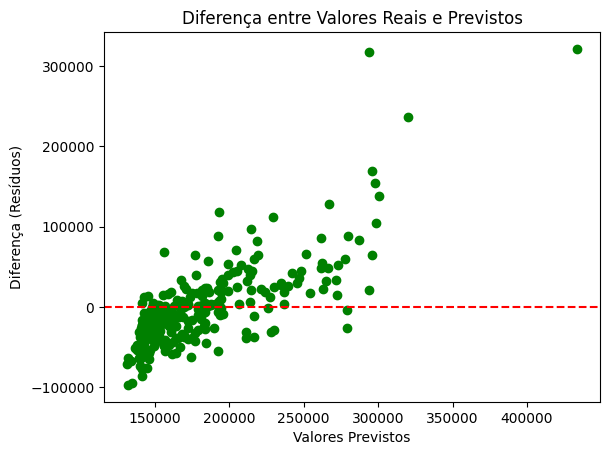

In [48]:
diferencas = y_test - y_gbr_v1

# Plotar um gráfico de dispersão das diferenças
plt.scatter(y_gbr_v1, diferencas, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Adicionando uma linha horizontal em y=0 para facilitar a visualização das diferenças
plt.xlabel('Valores Previstos')
plt.ylabel('Diferença (Resíduos)')
plt.title('Diferença entre Valores Reais e Previstos')
plt.show()

## Tentativa 2 - aumento a max depth

In [49]:
gbr_v2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)

In [50]:
gbr_v2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, random_state=42)

In [51]:
y_gbr_v2 = gbr_v2.predict(X_test)

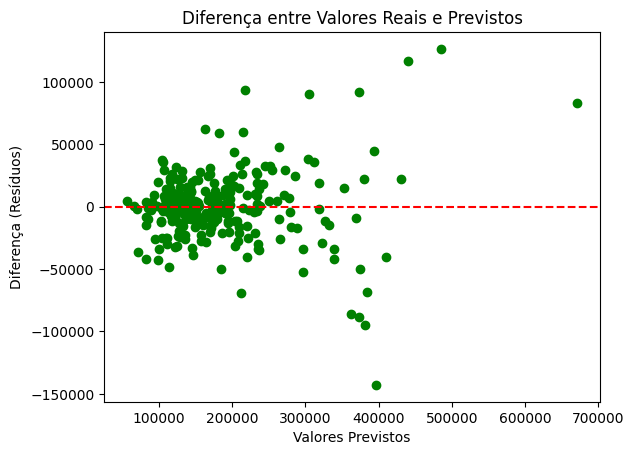

In [52]:
diferencas = y_test - y_gbr_v2

# Plotar um gráfico de dispersão das diferenças
plt.scatter(y_gbr_v2, diferencas, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Adicionando uma linha horizontal em y=0 para facilitar a visualização das diferenças
plt.xlabel('Valores Previstos')
plt.ylabel('Diferença (Resíduos)')
plt.title('Diferença entre Valores Reais e Previstos')
plt.show()

## Tentativa 3 - Aumentando o n_estimators

In [53]:
gbr_v3 = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

In [54]:
gbr_v3.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=300, random_state=42)

In [55]:
y_gbr_v3 = gbr_v3.predict(X_test)

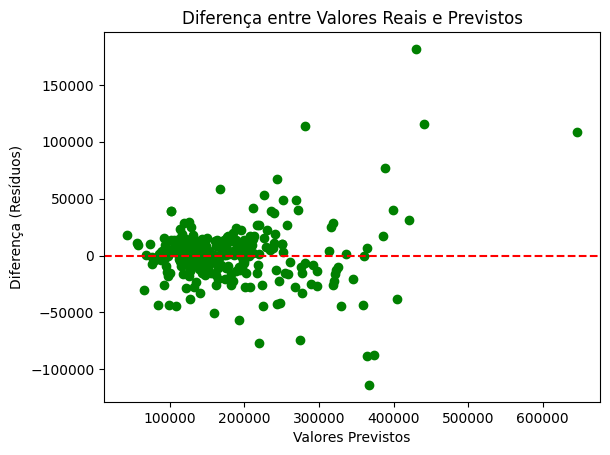

In [56]:
diferencas = y_test - y_gbr_v3

# Plotar um gráfico de dispersão das diferenças
plt.scatter(y_gbr_v3, diferencas, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Adicionando uma linha horizontal em y=0 para facilitar a visualização das diferenças
plt.xlabel('Valores Previstos')
plt.ylabel('Diferença (Resíduos)')
plt.title('Diferença entre Valores Reais e Previstos')
plt.show()

## Comparação estatistica

In [57]:
# Calculando o erro médio absoluto (MAE)
mae_gbr    = mean_absolute_error(y_test, y_gbr)
mae_gbr_v1 = mean_absolute_error(y_test, y_gbr_v1)
mae_gbr_v2 = mean_absolute_error(y_test, y_gbr_v2)
mae_gbr_v3 = mean_absolute_error(y_test, y_gbr_v3)
# Calculando o erro quadrático médio (MSE)
mse_gbr    = mean_squared_error(y_test, y_gbr)
mse_gbr_v1 = mean_squared_error(y_test, y_gbr_v1)
mse_gbr_v2 = mean_squared_error(y_test, y_gbr_v2)
mse_gbr_v3 = mean_squared_error(y_test, y_gbr_v3)
print('O valor base de comparação é o seguinte:')
print("Erro Médio Absoluto (MAE):", mae_gbr)
print("Erro Quadrático Médio (MSE):", mae_gbr)
print('')
print('Tentativa 1')
print("Erro Médio Absoluto (MAE):", mae_gbr_v1)
print("Erro Quadrático Médio (MSE):", mse_gbr_v1)
print('')
print('Tentativa 2')
print("Erro Médio Absoluto (MAE):", mae_gbr_v2)
print("Erro Quadrático Médio (MSE):", mse_gbr_v2)
print('')
print('Tentativa 3')
print("Erro Médio Absoluto (MAE):", mae_gbr_v3)
print("Erro Quadrático Médio (MSE):", mse_gbr_v3)

O valor base de comparação é o seguinte:
Erro Médio Absoluto (MAE): 16880.99283476928
Erro Quadrático Médio (MSE): 16880.99283476928

Tentativa 1
Erro Médio Absoluto (MAE): 33185.68473334416
Erro Quadrático Médio (MSE): 2531534340.957255

Tentativa 2
Erro Médio Absoluto (MAE): 17594.695583907847
Erro Quadrático Médio (MSE): 755193284.3581843

Tentativa 3
Erro Médio Absoluto (MAE): 16320.500605024547
Erro Quadrático Médio (MSE): 722555582.5546342


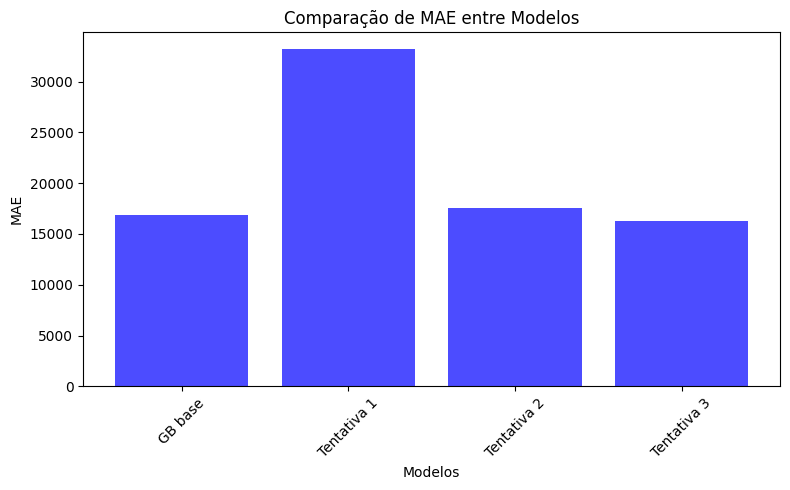

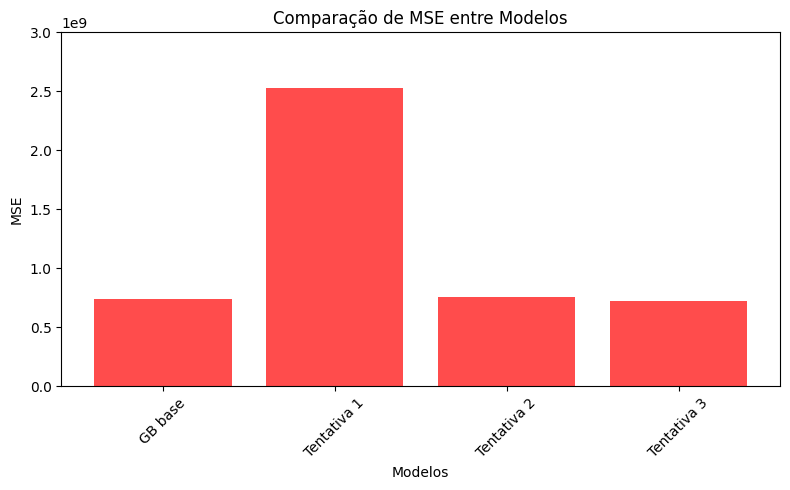

In [58]:
mae_values = [mae_gbr, mae_gbr_v1, mae_gbr_v2, mae_gbr_v3 ]
mse_values = [mse_gbr, mse_gbr_v1, mse_gbr_v2, mse_gbr_v3]
model_names = ['GB base', 'Tentativa 1', 'Tentativa 2', 'Tentativa 3']


plt.figure(figsize=(8, 5))
plt.bar(model_names, mae_values, color='blue', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparação de MAE entre Modelos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()

# Criando o gráfico de barras para MSE
plt.figure(figsize=(8, 5))
plt.bar(model_names, mse_values, color='red', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparação de MSE entre Modelos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.ylim(0, 3000000000)
plt.tight_layout()
plt.show()

Nenhum dos modelos superam o modelo base de teste. Será usado o modelo de gradient boosting inicial.

# Teste

## Pre-Processamento

### preenchimento de nulos

In [59]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [61]:
test = test.drop(['PoolQC','MiscFeature'], axis = 1)

In [62]:
test['Alley'] = test['Alley'].fillna('Na')
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['BsmtQual'] = test['BsmtQual'].fillna('Po')
test['BsmtCond'] = test['BsmtCond'].fillna('TA')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('Unf')
test['Electrical'] = test['Electrical'].fillna('SBrkr')
test['GarageType'] = test['GarageType'].fillna('Attchd')
test['GarageQual'] = test['GarageQual'].fillna('NA')
test['GarageCond'] = test['GarageCond'].fillna('NA')
test['Fence'] = test['Fence'].fillna('NA')
test['LotFrontage'] = test['LotFrontage'].fillna(0)
test['FireplaceQu'] = test['FireplaceQu'].fillna('NA')
test['GarageFinish'] = test['GarageFinish'].fillna('Unf')

In [63]:
test['Utilities'] = test['Utilities'].fillna('AllPub')
test['Exterior1st'] = test['Exterior1st'].fillna('VinylSd')
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0.0)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0.0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0.0)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0.0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0.0)
test['Functional'] = test['Functional'].fillna('Typ')
test['GarageCars'] = test['GarageCars'].fillna(2.0)
test['SaleType'] = test['SaleType'].fillna('WD')


In [64]:
test['Exterior2nd'] = test['Exterior2nd'].fillna('VinylSd')
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0.0)
test['GarageArea'] = test['GarageArea'].fillna(0.0)
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

In [65]:
valores_nulos = test['BsmtExposure'].isnull()
qtd_nulos = valores_nulos.sum()
preenchimento = ((test['BsmtExposure'].value_counts() / 1460)*100) * qtd_nulos

for categoria, qtd_preencher in preenchimento.items():
    test.loc[valores_nulos, 'BsmtExposure'] = test.loc[valores_nulos, 'BsmtExposure'].fillna(categoria, limit=int(qtd_preencher))

In [66]:
test = preencher_nulos_com_proporcao(test,'BsmtFinType1')

In [67]:
test['BsmtExposure'] = test['BsmtExposure'].fillna('No')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('Unf')
test['MSZoning'] = test['MSZoning'].fillna('RL')

In [68]:
valores_nulos = test['GarageYrBlt'].isnull()
qtd_nulos = valores_nulos.sum()
preenchimento = ((test['GarageYrBlt'].value_counts() / 1460)*100) * qtd_nulos

for categoria, qtd_preencher in preenchimento.items():
    test.loc[valores_nulos, 'GarageYrBlt'] = test.loc[valores_nulos, 'GarageYrBlt'].fillna(categoria, limit=int(qtd_preencher))

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Encoding

In [70]:
test['LandContour'] = test['LandContour'].map({'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1})
test['MSZoning'] = test['MSZoning'].map({'A ': 1, ""'C (all)': 2, ""'FV': 3, 'I': 4, 'RH': 5, ""'RL': 6, 'RP': 7, ""'RM': 8})
test['Street'] = test['Street'].map({'Grvl': 1,'Pave': 2})
test['Alley'] = test['Alley'].map({'Grvl': 1, 'Pave': 2, 'Na':3,})

In [71]:
test['LotShape'] = test['LotShape'].map({'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4})
test['LotConfig'] = test['LotConfig'].map({'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3':5})

In [72]:
test['ExterQual'] = test['ExterQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})
test['BsmtQual'] = test['BsmtQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5})
test['FireplaceQu'] = test['FireplaceQu'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})
test['GarageQual'] = test['GarageQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})
test['GarageCond'] = test['GarageCond'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5,'NA': 6})

In [73]:
test['Utilities'] = test['Utilities'].map({'AllPub':1,'NoSeWa':2})
test['LandSlope'] = test['LandSlope'].map({'Gtl': 1, 'Mod': 2, 'Sev': 3})
test['BsmtCond'] = test['BsmtCond'].map({'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

In [74]:
test['Neighborhood'] = test['Neighborhood'].map({'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5,
                                             'Somerst':6,'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11,
                                             'NAmes':12,'SawyerW':13, 'IDOTRR':14,'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18,
                                             'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24,'Blueste':25})

test['Condition1'] = test['Condition1'].map({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8,'RRNe':9})
test['Condition2'] = test['Condition2'].map({'Norm':1, 'Artery':2, 'RRNn':3, 'Feedr':4, 'PosN':5, 'PosA':6, 'RRAn':7, 'RRAe':8})
test['BldgType'] = test['BldgType'].map({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5})
test['HouseStyle'] = test['HouseStyle'].map({'2Story':1, '1Story':2, '1.5Fin':3, '1.5Unf':4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7,'2.5Fin':8})
test['RoofStyle'] = test['RoofStyle'].map({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6})
test['RoofMatl'] = test['RoofMatl'].map({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6,'Roll':7, 'ClyTile':8})

test['Exterior1st'] = test['Exterior1st'].map({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,'CemntBd':7, 'Plywood':8,
                                           'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,'Stone':13, 'ImStucc':14, 'CBlock':15})
test['Exterior2nd'] = test['Exterior2nd'].map({'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6,'CmentBd':7, 'BrkFace':8,
                                           'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12,'AsphShn':13, 'Stone':14, 'Other':15, 'CBlock':16})

test['MasVnrType'] = test['MasVnrType'].map({'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn':4})
test['ExterCond'] = test['ExterCond'].map({'TA':1, 'Gd':2, 'Fa':3, 'Po':4, 'Ex':5})
test['BsmtExposure'] = test['BsmtExposure'].map({'No':1, 'Gd':2, 'Mn':3, 'Av':4})
test['BsmtFinType1'] = test['BsmtFinType1'].map({'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'LwQ':6})
test['BsmtFinType2'] = test['BsmtFinType2'].map({'Unf':1, 'BLQ':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
test['Heating'] = test['Heating'].map({'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6})
test['HeatingQC'] = test['HeatingQC'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
test['CentralAir'] = test['CentralAir'].map({'Y':1, 'N':2})
test['Electrical'] = test['Electrical'].map({'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5})

In [75]:
test['Foundation']=test['Foundation'].map({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':6})
test['KitchenQual']=test['KitchenQual'].map({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4})
test['GarageType']=test['GarageType'].map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'CarPort':4, 'Basment':5, '2Types':6})
test['GarageFinish']=test['GarageFinish'].map({'RFn':1, 'Unf':2, 'Fin':3})
test['PavedDrive']=test['PavedDrive'].map({'Y':1, 'N':2, 'P':3})
test['Fence']=test['Fence'].map({'NA':1, 'MnPrv':2, 'GdWo':3, 'GdPrv':4, 'MnWw':5})
test['SaleType']=test['SaleType'].map({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9})
test['SaleCondition']=test['SaleCondition'].map({'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand':4, 'Alloca':5, 'Family':6})
test['Functional']=test['Functional'].map({'Typ':1, 'Min1':2, 'Maj1':3, 'Min2':4, 'Mod':5, 'Maj2':6, 'Sev':7})

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Teste

In [89]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,saling_estimate
0,1461,20,5,80.0,11622,2,3,1,4,1,...,0,120,0,2,0,6,2010,1,1,124764.96
1,1462,20,6,81.0,14267,2,3,2,4,1,...,0,0,0,1,12500,6,2010,1,1,155172.82
2,1463,60,6,74.0,13830,2,3,2,4,1,...,0,0,0,2,0,3,2010,1,1,175736.84
3,1464,60,6,78.0,9978,2,3,2,4,1,...,0,0,0,1,0,6,2010,1,1,178597.86
4,1465,120,6,43.0,5005,2,3,2,2,1,...,0,144,0,1,0,1,2010,1,1,201608.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,8,21.0,1936,2,3,1,4,1,...,0,0,0,1,0,6,2006,1,1,90195.81
1455,2916,160,8,21.0,1894,2,3,1,4,1,...,0,0,0,1,0,4,2006,1,2,91657.65
1456,2917,20,6,160.0,20000,2,3,1,4,1,...,0,0,0,1,0,9,2006,1,2,181882.22
1457,2918,85,6,62.0,10441,2,3,1,4,1,...,0,0,0,2,700,7,2006,1,1,126256.69


In [78]:
y = gbr.predict(test)

In [88]:
y = [round(y, 2) for y in y]
test['saling_estimate'] = y